In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('1301_aqi_location.csv')
data.head()

,Unnamed: 0.1,PM2.5(微克每立方米),PM10(微克每立方米),SO2(微克每立方米),NO2(微克每立方米),CO(毫克每立方米),O3(微克每立方米),U(m/s),V(m/s),TEMP(K),RH(%),PSFC(Pa),lat,lon,,Unnamed: 0,市,省,区/县,AQI
0,0,20.21,23.56,8.65,4.58,0.29,63.44,-2.48,-2.31,291.54,68.14,100350.11,18.34,109.25,,0,三亚市,海南省,天涯区,28.871429
1,1,20.41,23.96,9.28,5.24,0.29,62.53,-3.43,-3.21,291.96,67.41,100546.63,18.34,109.38,,1,三亚市,海南省,天涯区,29.157143
2,2,21.17,24.78,10.07,5.47,0.30,62.24,-3.43,-4.72,291.37,69.59,100428.13,18.33,109.52,,2,三亚市,海南省,吉阳区,30.242857
3,3,22.24,26.04,10.36,5.28,0.30,63.58,-2.92,-5.32,290.74,72.94,100569.27,18.33,109.66,,3,三亚市,海南省,吉阳区,31.771429
4,4,19.68,22.34,7.62,3.58,0.29,66.21,-2.51,-3.13,291.67,65.97,101620.34,18.49,108.83,,4,乐东黎族自治县,海南省,乐东黎族自治县,28.114286


In [3]:
df = pd.read_csv("D:/计算机大三上/大数据分析实践/project/CN-Reanalysis201301/201301/CN-Reanalysis-daily-2013010100.csv")
df['时间'] = '13-1-1'
for date in range(2,32):
    with open("D:/计算机大三上/大数据分析实践/project/CN-Reanalysis201301/201301/CN-Reanalysis-daily-201301{}00.csv".format(str(date).zfill(2))) as f:
        df_temp = pd.read_csv(f)
        time = '13-1-{}'.format(date)
        df_temp['时间'] = '13-1-{}'.format(date)
        df = pd.concat([df,df_temp])

In [4]:
df = df.drop(df.columns[-2],axis=1)

In [5]:
location = pd.read_csv('经纬度_省市区_final.csv',index_col=False)
location = location.drop(location.columns[0],axis=1)

In [6]:
df = pd.merge(df,location,how='left',on=[' lat',' lon'])

In [7]:
Beijing = df[df['省']=='北京市']

In [8]:
pollute = ['PM2.5(微克每立方米)', ' PM10(微克每立方米)', ' SO2(微克每立方米)', ' NO2(微克每立方米)',
       ' CO(毫克每立方米)', ' O3(微克每立方米)']

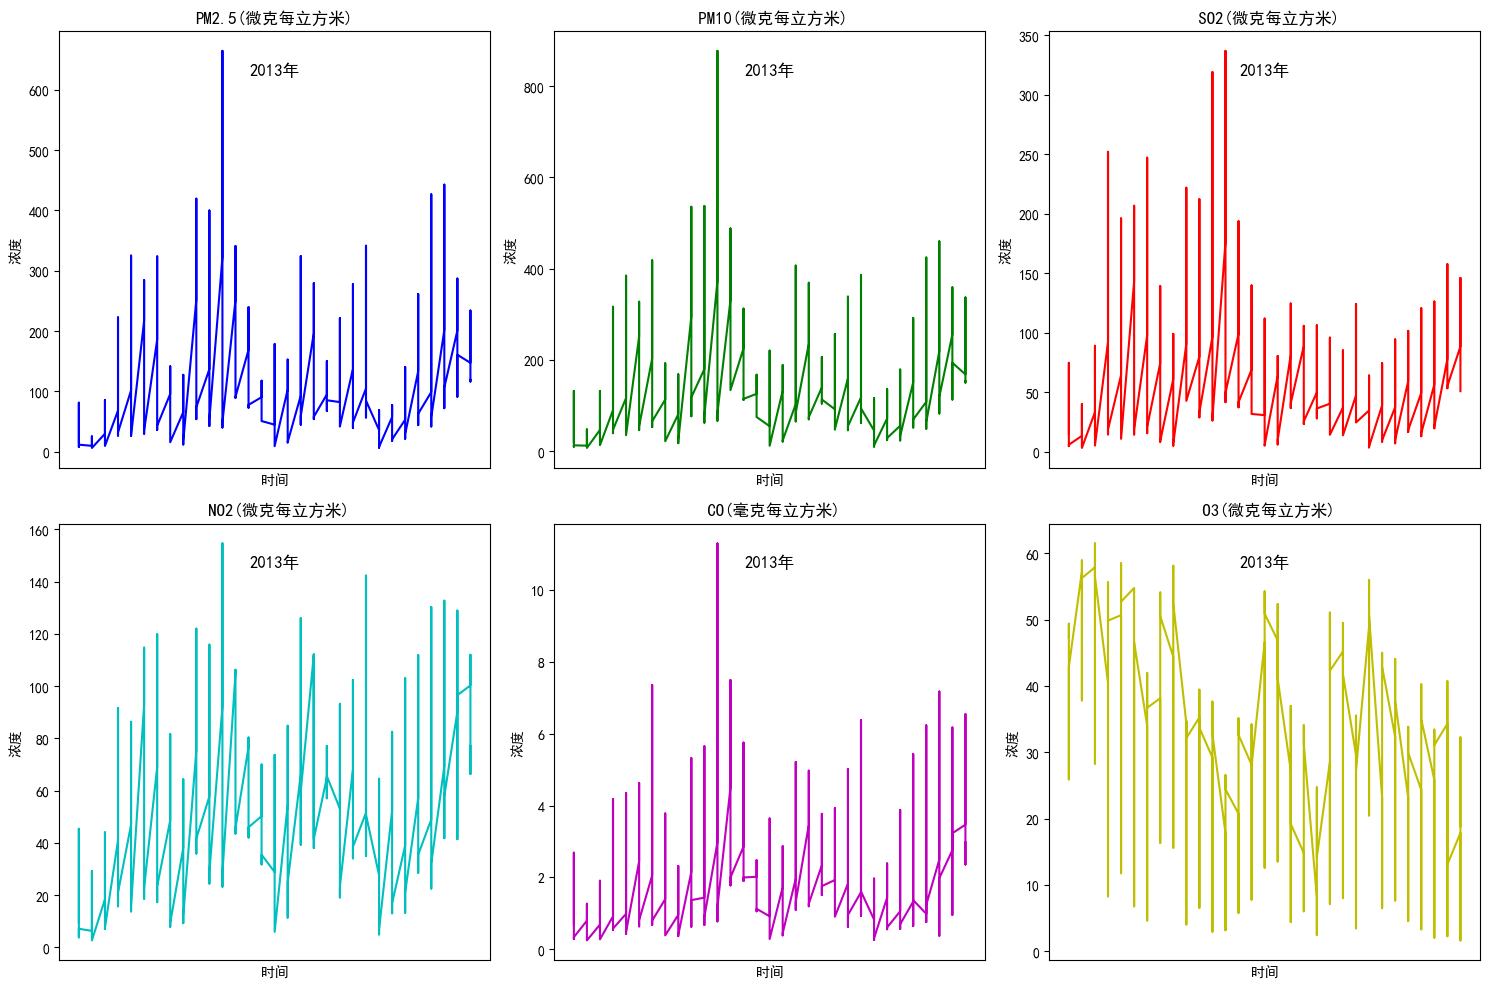

In [12]:
# 北京
# 设置子图的行和列
num_rows = 2
num_cols = 3

plt.rcParams["font.sans-serif"]=["SimHei"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题


# 创建一个包含子图的画布
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))

# 将所有子图放在一个二维数组中
axes = axes.flatten()

# 定义颜色列表
colors = ['b', 'g', 'r', 'c', 'm', 'y']

# 绘制六个子图
for i, pollutant in enumerate(pollute):
    ax = axes[i]
    color = colors[i % len(colors)]  # 使用颜色列表中的颜色
    ax.plot(Beijing['时间'], Beijing[pollutant], label=pollutant, color=color)
    ax.set_title(pollutant)
    ax.set_xlabel('时间')
    ax.set_ylabel('浓度')

    # 省略x轴标签
    ax.set_xticks([])

    ax.text(0.5, 0.9, '2013年', transform=ax.transAxes, fontsize=12, ha='center')


# 调整子图布局
plt.tight_layout()

# 显示合并的图
plt.show()


In [3]:
import pandas as pd
df = pd.read_excel('桑葚图.xlsx')

In [4]:
df

,年份,优,良,轻度污染,中度污染,重度污染,严重污染
0,2013,0.112545,0.035236,0.011230,0.004033,0.002613,0.001010
1,2014,0.108855,0.039100,0.011909,0.003790,0.002123,0.000890
2,2015,0.113691,0.036603,0.010326,0.003403,0.001878,0.000765
3,2016,0.122509,0.032435,0.007399,0.002455,0.001359,0.000510
4,2017,0.122541,0.032655,0.007441,0.002249,0.001304,0.000475
5,2018,0.122760,0.032210,0.007385,0.002312,0.001341,0.000659
